In [38]:
import pandas as pd 
df_titanic=pd.read_csv(r"C:\Users\Nihan\CENG310\IntroductionToDataScience\Assignments\ceng313_fall2021_assignment1\train.csv")
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
#Q1: Here the last six passengers are listed
df_titanic.tail(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [40]:
#Q2: Here the column names are displayed
print(df_titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [41]:
#Q3 Here the size represents the number of cells filled (elements) in the data set
#   On the other hand, using the shape attribute of the DataFrame object, number of rows and columns (dimension) are listed.
#   As it can be easily guessed the product of dimension elements is equal to the value we found for the size
print("Size: "+str(df_titanic.size))
print("Dimension: "+str(df_titanic.shape))

Size: 10692
Dimension: (891, 12)


In [42]:
#Q4: In the dataset, missing values exist only for "Age", "Cabin" and "Embarked" attributes.
#    177 pasengers' "Age" information, 687 passengers' "Cabin" information and 2 passengers' "Embarked" information
#    are missing in the dataset 
print(df_titanic.isnull().sum())
#df_titanic.dropna(how="any")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


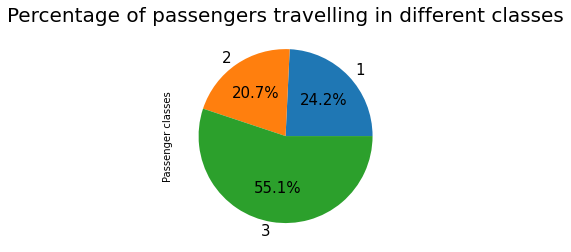

In [43]:
#Q5: 24.2% of the passengers are in the 1st class ,20.7% of the passengers are in the 2nd class 
#    and 55.1% of the passengers are in the 3rd class. So we can conclude that 3rd class has more
#    passengers than other classes.
from matplotlib import pyplot as plt

count_of_Pclass=df_titanic.groupby('Pclass').count()

count_of_Pclass.plot(y='PassengerId',kind='pie',fontsize=15,legend=False,autopct='%1.1f%%')
plt.ylabel('Passenger classes',horizontalalignment='center')
plt.title('Percentage of passengers travelling in different classes',fontsize=20)
plt.show()
plt.close()

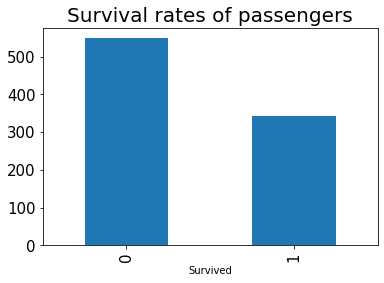

In [44]:
#Q6: As it can be seen from the bar chart the number of passengers who survived are less than the people who did
#    not survive
count_of_survived=df_titanic.groupby('Survived').count()
count_of_survived.plot(y='PassengerId',kind='bar',fontsize=15,legend=False)
plt.title('Survival rates of passengers',fontsize=20)
plt.show()
plt.close()

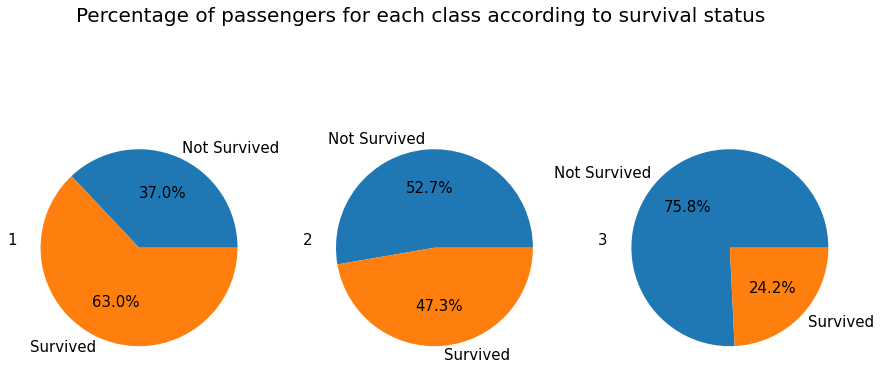

In [45]:
#Q7
cross_table=pd.crosstab(df_titanic['Survived'],df_titanic['Pclass'])
labels_for_survived=["Not Survived","Survived"]
pies=cross_table.plot(kind='pie',subplots=True,legend=False,autopct='%.1f%%',labels=labels_for_survived,figsize=(15,7),
                      fontsize=15)

for pie in pies:
    label=pie.get_ylabel()
    pie.set_ylabel(label,rotation=0,fontsize=15)
plt.suptitle('Percentage of passengers for each class according to survival status',fontsize=20)

plt.show()

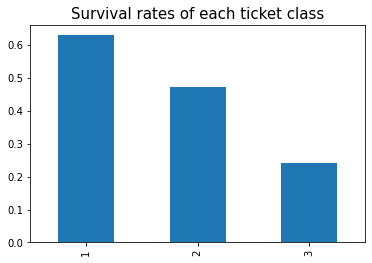

In [46]:
#Q8: As we can see in the 5th question's output pie chart, there are more passengers in the 3rd class and the least number 
#    of passengers is in the 2nd class. Moreover, the survival rates in each class is as it is shown with the bar chart below.
#    It can easily be seen that the rate of survival is higher in the group of 1st class passengers and the least survival rate
#    belongs to 3rd class passengers. The reason behind this may be the economical status of the passengers which allows them
#    to have more access to safety tools via their ticket status.

rates=[]
for i in range(1,4):
    number_of_survived=df_titanic[df_titanic["Pclass"]==i]
    number_of_survived_count=number_of_survived.count().PassengerId
    rate_of_survived=number_of_survived[number_of_survived["Survived"]==1].count().PassengerId/number_of_survived_count
    rates.append(rate_of_survived)

df_survival_rates_classes=pd.DataFrame(rates,index=[1,2,3],columns=["rates"])
df_survival_rates_classes.plot(kind='bar',legend=False)
plt.title("Survival rates of each ticket class",fontsize=15)
plt.show()

In [47]:
#Q9: As it can be seen from the crosstable female passengers have the most number of survivors and male passengers have
#    lowest number of survivors. These numbers don't give us the information of survival rate.
#    Survival rate for females is: 0.74
#    Survival rate for males is: 0.19
table = pd.crosstab(df_titanic['Sex'],df_titanic['Survived'],margins=True, margins_name="All")

table

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


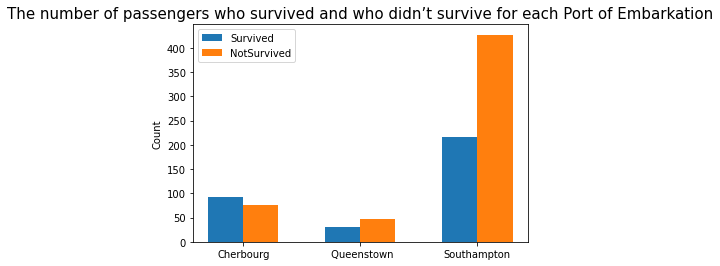

In [48]:
#Q10: The port of embarkation that the number of passengers survived the most is Southampton but essentially this
#     gives no information about rate of survival for each port of embarkation. Because, as it can be seen from the bar 
#     chart, for the Cherbourg port, the number of passengers survived is higher than who did not survive. On the other hand,
#     for Southampton port, -although it has the highest number of survivers across all the ports- the number of passengers 
#     died is almost two times of survivers. So, actually for Southampton the survival rate is quite low.
import numpy as np

survivors_data = df_titanic[df_titanic.Survived==True]
non_survivors_data = df_titanic[df_titanic.Survived==False]

survivors_class = survivors_data.groupby(['Embarked']).size().values
non_survivors_class = non_survivors_data.groupby(['Embarked']).size().values

class_categories = ['Cherbourg', ' Queenstown', 'Southampton']

x=np.arange(3)
plt.bar(x-0.15,survivors_class,0.30,label='Survived')
plt.bar(x+0.15,non_survivors_class,0.30,label='NotSurvived')
plt.xticks([0.0, 1.0, 2.0], class_categories)
plt.title("The number of passengers who survived and who didn’t survive for each Port of Embarkation",fontsize=15)
plt.ylabel("Count")
plt.legend(loc='upper left')
plt.show()


In [49]:
#Q11: According to the results of the table we can calculate the survival rates for each group like this:
#     child: 0.52
#     adult: 0.39
#     old: 0.27
#     So the highest survival rate belongs to child age group
#     The reason behind this may be the priority of evacuation given to children and females. Because as it can be 
#     easily seen from the table survivors are more than non_survivors among females in every age group while for males 
#     it is the complete opposite.
pd.options.mode.chained_assignment = None
all_df=df_titanic.copy()
df_for_ages=all_df[all_df['Age'].notna()]
conditions=[
    (0<=df_for_ages['Age'])&(df_for_ages['Age']<=18),
    (19<=df_for_ages['Age'])&(df_for_ages['Age']<60),
    (60<=df_for_ages['Age'])
]
values=['child','adult','old']
df_for_ages['AgeGroup']=np.select(conditions,values)
table2=pd.crosstab([df_for_ages['Sex'],df_for_ages['Survived']],df_for_ages['AgeGroup'],margins=True,margins_name='All')
table2.loc[:, ["child","adult","old","All"]]

#df_titanic

AgeGroup         child  adult  old  All
Sex    Survived                        
female 0            22     42    0   64
       1            46    147    4  197
male   0            47    294   19  360
       1            24     66    3   93
All                139    549   26  714

In [50]:
#Q13: The most commonly used title is Mr. 
name_titles=df_titanic['Name'].apply(lambda x:x.split(',')[1].split('.')[0])
name_titles_groups=name_titles.groupby(name_titles).count()

print("The most commonly used title is: "+name_titles_groups.idxmax())

The most commonly used title is:  Mr


In [51]:
#Q14: The number of distinc titles is found 17. All these titles are as shown in the table. Also it is shown
#     the number of usage of each title
name_titles2=df_titanic['Name'].apply(lambda x:x.split(',')[1].split('.')[0])
name_titles_groups=name_titles.groupby(name_titles2).count()
distinct_titles=len(name_titles_groups)
print(name_titles_groups)
print("The number of distinc titles is: "+str(distinct_titles))

Name
 Capt              1
 Col               2
 Don               1
 Dr                7
 Jonkheer          1
 Lady              1
 Major             2
 Master           40
 Miss            182
 Mlle              2
 Mme               1
 Mr              517
 Mrs             125
 Ms                1
 Rev               6
 Sir               1
 the Countess      1
Name: Name, dtype: int64
The number of distinc titles is: 17


In [52]:
#Q15: The average of ages is calculated as 29.69.... from the non-missing values of ages. This average may not be true in
#     reality because there are a lot of missing values for age field
mean_of_age=df_for_ages['Age'].mean()
print("Average age of the passengers: "+str(mean_of_age))

Average age of the passengers: 29.69911764705882


<AxesSubplot:xlabel='Survived', ylabel='Age'>

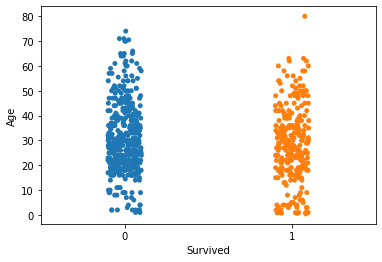

In [53]:
#Q16: Looking at the chart it is obvious that dots are denser between the 10-40 age interval for both survivers and
#     non-survivors. From this result it can be inferred that also the rate of number of people in this group to the number
#     of all passengers is higher than other age groups.
#tips = sns.load_dataset(df_titanic)
import seaborn as sns
strip_age_survived=sns.stripplot(x=df_for_ages["Survived"], y=df_for_ages["Age"])
strip_age_survived

In [54]:
#Q17: Amongst survivers the oldest person's age is 80
survivers=df_for_ages[df_for_ages['Survived']==1]
survivers_oldest=survivers['Age'].max()
print("Age of the oldest person to survive: "+str(survivers_oldest))

Age of the oldest person to survive: 80.0


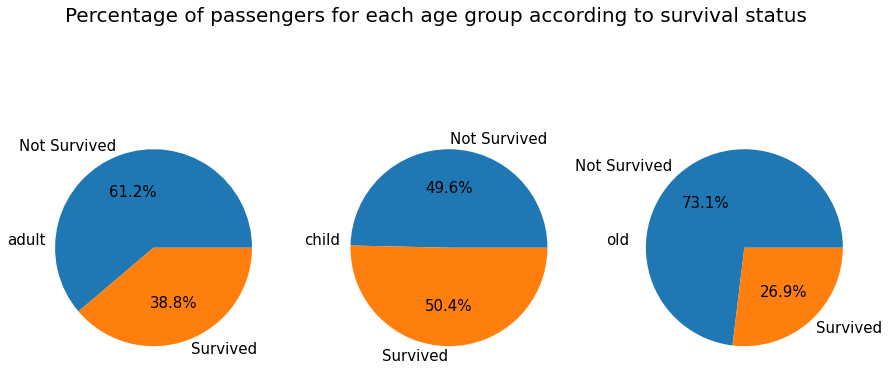

In [55]:
#Q18-19: We can see that possibility of children to survive is higher than other age groups. Children have the rate of
#        survival by 50.4% chance. On the other hand, elderly people have the lowest rate of survival chance between all 
#        age groups.It should not be forgotten that in our dataset there are some missing values for passengers' ages.
#        Since, the passengers having these missing datas are not included in any of the age groups, our deduction 
#        may not be true in reality. But this is what we conclude with the existing data we have.
from imp import reload
reload(plt)
valid_age_group=df_for_ages[df_for_ages['AgeGroup']!="0"]
survived_age = pd.crosstab(valid_age_group['Survived'], valid_age_group['AgeGroup'])

pies2=survived_age.plot(kind='pie',subplots=True,legend=False,autopct='%.1f%%',labels=labels_for_survived,figsize=(15,7),
                      fontsize=15)
for pie in pies2:
    label=pie.get_ylabel()
    pie.set_ylabel(label,rotation=0,fontsize=15)
plt.suptitle('Percentage of passengers for each age group according to survival status',fontsize=20)
plt.show()


In [56]:
#Q20: According to our finding he number of siblings of the passenger who has the highest number of siblings is 8 
highest_sibling=df_titanic['SibSp'].max()
print("The number of siblings of the passenger who has the highest number of siblings: "+str(highest_sibling))

The number of siblings of the passenger who has the highest number of siblings: 8
